Lesson 1 - Linear Regression and Gradient Descent

In [2]:
#Create an automated system to estimate annual medical expenditures for new customers
#Based on age, sex, BMI, children, smoking habits, and region of residence
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
import pandas as pd

medical_df = pd.read_csv(medical_charges_url)

In [4]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medical_df.shape

(1338, 7)

In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Exploratory Data Analysis

In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#Set default styles
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
#Age
medical_df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal = 'box',
                   nbins = 47,
                   title = 'Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

In [12]:
#Body Mass Index Distribution
medical_df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [13]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence = ['red'],
                   title = 'Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()

In [14]:
#Distribution of Charges
medical_df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [15]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence = ['green', 'grey'],
                   title = 'Distribution of Annual Medical Charges by Smoker/Non-Smoker')
fig.update_layout(bargap = 0.1)
fig.show()

In [16]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence = ['pink', 'blue'],
                   title = 'Distribution of Annual Medical Charges by Sex')
fig.update_layout(bargap = 0.1)
fig.show()

In [17]:
sorted_by_children_df = medical_df.sort_values('children')
fig = px.histogram(sorted_by_children_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'children',
                   color_discrete_sequence = ['red', 'orange', 'yellow', 'green', 'blue', 'purple'],
                   title = 'Distribution of Annual Medical Charges By Number of Children')
fig.update_layout(bargap = 0.1)
fig.show()

In [18]:
#Smoker Distribution
medical_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [19]:
px.histogram(medical_df, x = 'smoker', color = 'sex', title = 'Smoker by Sex')


In [20]:
#Age and Charges Relationship
fig = px.scatter(
    medical_df,
    x = 'age',
    y= 'charges',
    color = 'smoker',
    color_discrete_sequence = ['green', 'red'],
    opacity = 0.8,
    hover_data = ['sex', 'age'],
    title = 'Charges Vs Age By Smoking Status'
    )
fig.update_traces(marker_size = 5)
fig.show()

In [21]:
#BMI and Charges
fig = px.scatter(
    medical_df,
    y = 'charges',
    x = 'bmi',
    color = 'smoker',
    color_discrete_map = {'yes': 'green', 'no': 'red'},
    opacity = 0.7,
    hover_data = ['sex', 'age'],
    title = 'Charges Vs BMI By Smoker Status'
    )
fig.update_traces(marker_size = 5)
fig.show()

In [22]:
#Charges Vs Children
px.violin(medical_df, x = 'children', y = 'charges', title = 'Charges Vs Children')

In [24]:
#Charges Vs Sex
px.violin(medical_df, x = 'sex', y = 'charges', title = 'Charges Vs Sex')

In [25]:
#Charges Vs Smoker
px.violin(medical_df, x = 'smoker', y = 'charges', title = 'Charges Vs Smoker Status')

In [26]:
#Correlation Coefficient
medical_df['charges'].corr(medical_df['age'])

np.float64(0.29900819333064754)

In [27]:
medical_df['charges'].corr(medical_df['bmi'])

np.float64(0.19834096883362884)

In [28]:
medical_df['charges'].corr(medical_df['children'])

np.float64(0.0679982268479048)

In [30]:
#To do smoker status correlation assign numeric values to yes and no
status_to_numeric = {'yes': 1, 'no': 0}
medical_df['numeric_smoker'] = medical_df['smoker'].map(status_to_numeric)
medical_df['numeric_smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: numeric_smoker, Length: 1338, dtype: int64

In [31]:
medical_df['charges'].corr(medical_df['numeric_smoker'])

np.float64(0.7872514304984772)

In [35]:
medical_df.corr(numeric_only = True)

,age,bmi,children,charges,numeric_smoker
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
numeric_smoker,-0.025019,0.003750,0.007673,0.787251,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

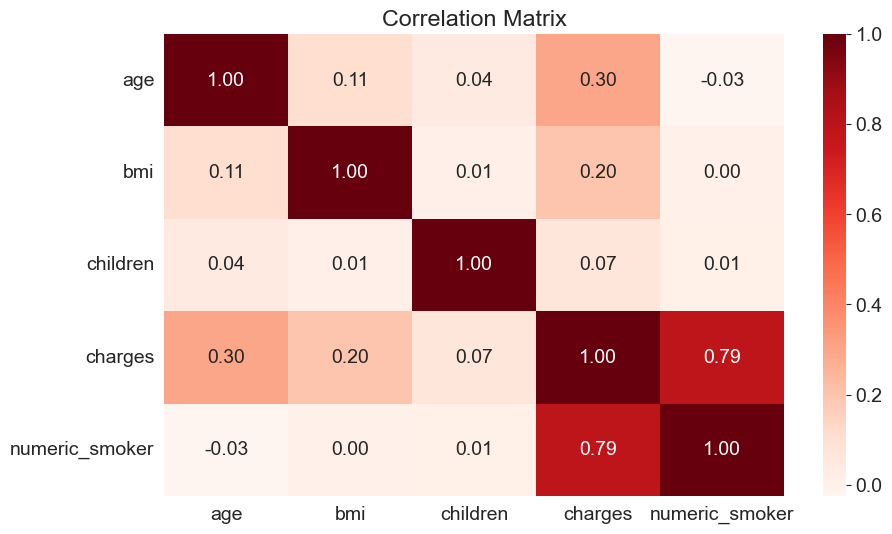

In [36]:
#Heatmap of correlation coefficients
sns.heatmap(medical_df.corr(numeric_only = True), cmap = 'Reds', annot = True, fmt = ".2f")
plt.title('Correlation Matrix')

In [38]:
#There is the strongest correlation between charges and smoker status
non_smoker_df = medical_df.loc[medical_df['smoker'] == 'no']

In [39]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges,numeric_smoker
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
5,31,female,25.740,0,no,southeast,3756.62160,0


<Axes: title={'center': 'Ages Vs Charges'}, xlabel='age', ylabel='charges'>

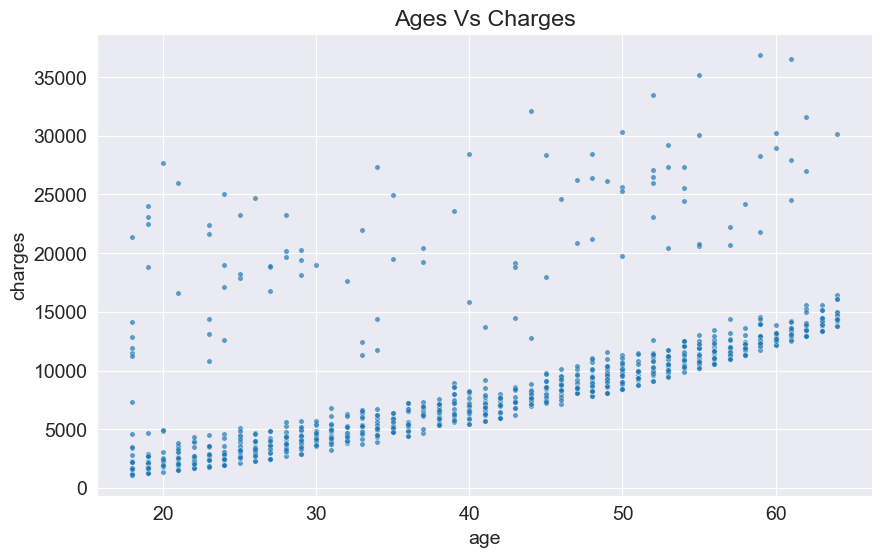

In [40]:
plt.title('Ages Vs Charges')
sns.scatterplot(non_smoker_df, y = 'charges', x = 'age', alpha = 0.7, s = 15)

In [41]:
#Using a linear regression
# y = wx + b, w is the slope and b is the y-intercept
# w is for weight, b is for bias
def estimate_charges(age, w , b):
    return age * w + b

In [42]:
#Guess values of w and b
w = 50
b = 100

In [47]:
ages = non_smoker_df['age']
estimated_charges = estimate_charges(ages, w, b)

In [50]:
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [51]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Text(0, 0.5, 'Estimated Charges')

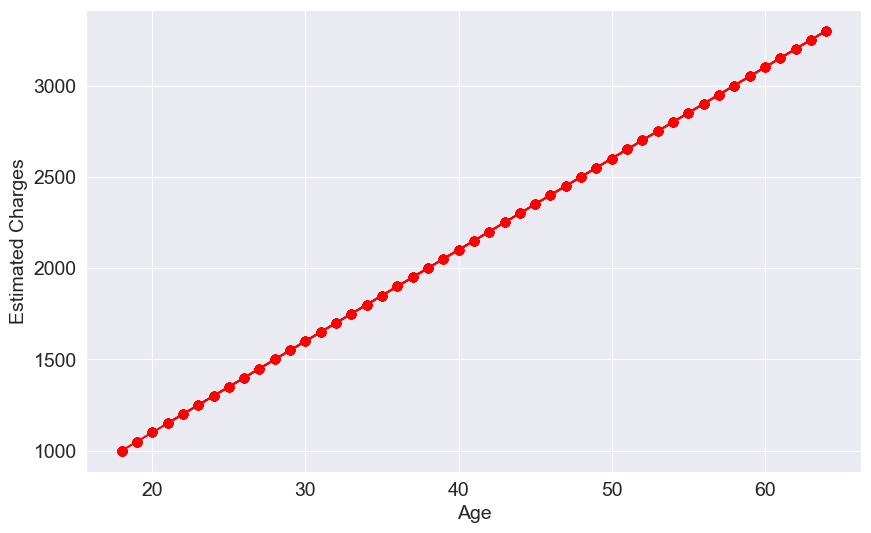

In [52]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

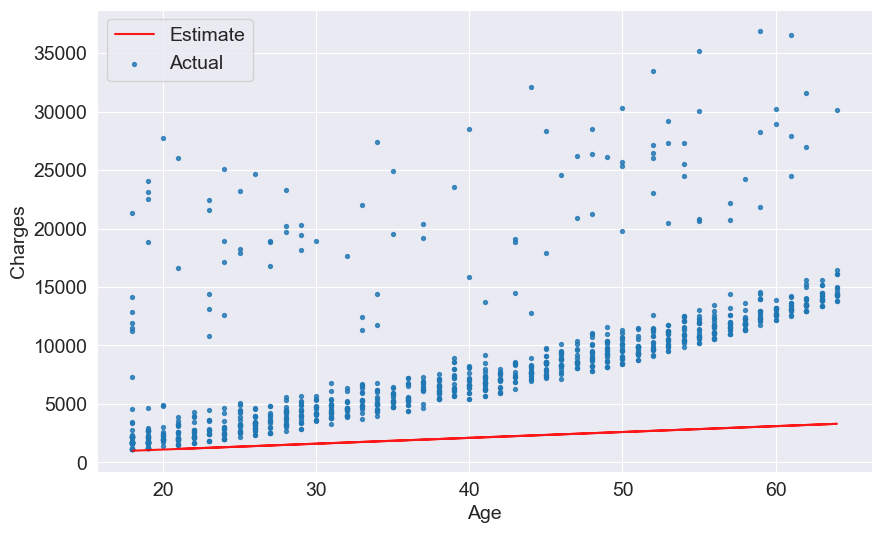

In [53]:
#Plot our linear regression guess over the actual data
target = non_smoker_df['charges']
plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [54]:
#The fit is not very good so we can create a function to vary parameters to test
def try_parameters(w, b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']

    estimated_charges = estimate_charges(ages, w, b)
    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

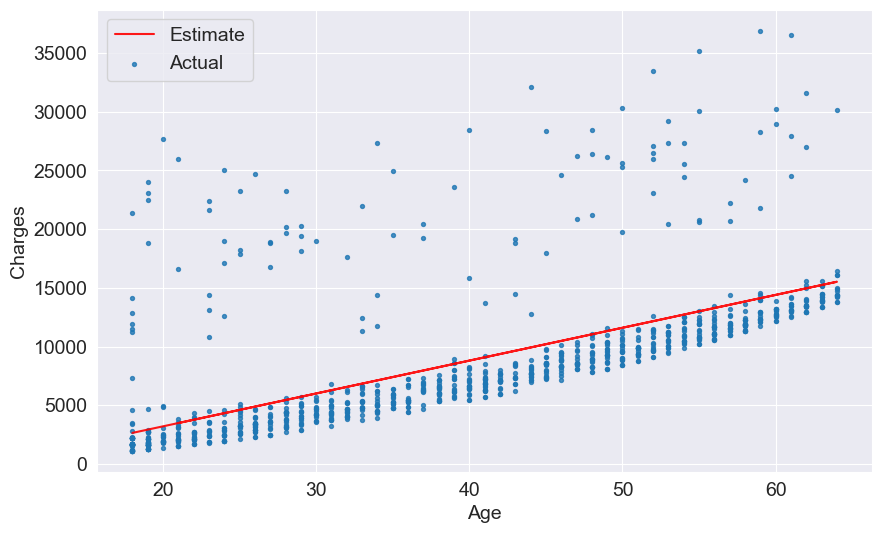

In [70]:
try_parameters(280, -2400)

In [71]:
#The best linear regression is found by the RMSE (Root Mean Squared Error)
# Calculate the difference between every target and the prediction
# Square all the values
# Calculate the avg
# Take square root of the result
import numpy as np

In [72]:
def rsme(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [73]:
#Use the function to test how bad our original model was
targets = non_smoker_df['charges']
estimated_charges = estimate_charges(non_smoker_df['age'], 50, 100)
rsme(targets, estimated_charges)

np.float64(8461.949562575493)

In [78]:
#This means on avg the prediction is over 8k dollars off
#Modify the try_parameters function to display the loss
def try_parameters(w, b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']

    predictions = estimate_charges(ages, w, b)
    plt.plot(ages, predictions, 'r', alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])

    loss = rsme(target, predictions)
    print(f"RSME Loss: {loss}")

RSME Loss: 4669.975316250036


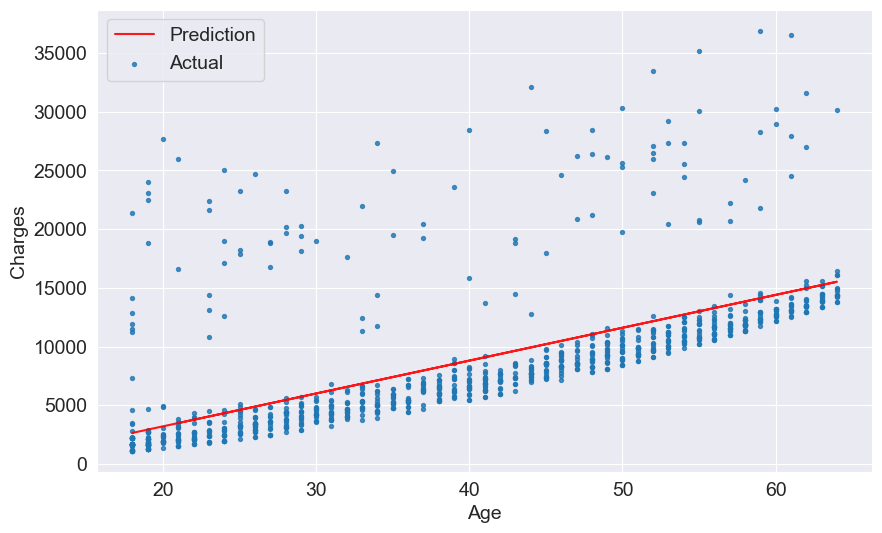

In [79]:
try_parameters(280, -2400)

In [ ]:
#Optimization
# Ordinary Least Square --> Good for small datasets
# Stochastic Gradient Descent --> Better for large datasets

In [80]:
#Linear Regression Using Sci-Kit Learn
from sklearn.linear_model import LinearRegression

In [81]:
#Create the model
model = LinearRegression()

In [ ]:
help(model.fit)
#The x must take a dataframe (2D) while the y takes a series (1D)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [84]:
inputs = non_smoker_df[['age']] #must be a dataframe not series
targets = non_smoker_df['charges']
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [85]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
model.predict(np.array([[23], [33], [63]])) #Predict for these ages

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  6727.79356686, 14745.2609518 ])

In [89]:
predictions = model.predict(inputs)

In [92]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [93]:
rsme(targets, predictions)

np.float64(4662.505766636395)

In [95]:
#w
model.coef_

array([267.24891283])

In [98]:
#b
model.intercept_

np.float64(-2091.4205565650773)

RSME Loss: 4662.505766636395


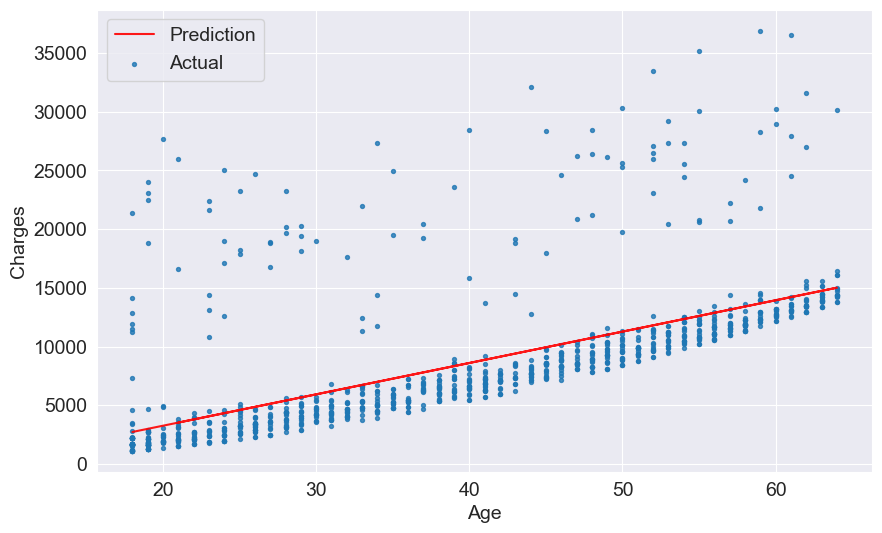

In [99]:
try_parameters(model.coef_, model.intercept_)

In [100]:
#Version with SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges'] 

In [101]:
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

In [102]:
model = SGDRegressor()

In [103]:
model.fit(inputs_scaled, targets)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [104]:
predictions = model.predict(inputs_scaled)

In [105]:
rsme(targets, predictions)

np.float64(4662.550679506655)

In [107]:
smoker_df = medical_df.loc[medical_df['smoker'] == 'yes']

In [108]:
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges,numeric_smoker
0,19,female,27.90,0,yes,southwest,16884.9240,1
11,62,female,26.29,0,yes,southeast,27808.7251,1
14,27,male,42.13,0,yes,southeast,39611.7577,1
19,30,male,35.30,0,yes,southwest,36837.4670,1
23,34,female,31.92,1,yes,northeast,37701.8768,1


In [109]:
model = LinearRegression()

In [110]:
inputs = smoker_df[['age']]
targets = smoker_df['charges'] 

In [111]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
predictions = model.predict(inputs)

In [114]:
print(model.coef_, model.intercept_)

[305.23760211] 20294.12812691597


In [117]:
def try_parameters_2(w, b):
    ages = smoker_df['age']
    target = smoker_df['charges']

    predictions = estimate_charges(ages, w, b)
    plt.plot(ages, predictions, 'r', alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])

    loss = rsme(target, predictions)
    print(f"RSME Loss: {loss}")

RSME Loss: 10711.00334810241


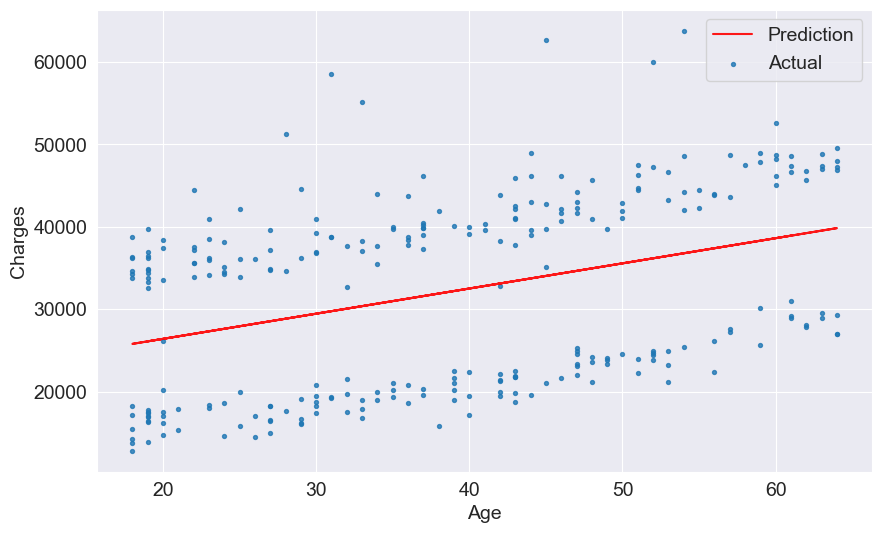

In [118]:
try_parameters_2(model.coef_, model.intercept_)

Linear Regression with Multiple Features

In [119]:
#We can use multiple features to create a model such as age and bmi
#Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rsme(targets, predictions)
print(f"Loss: {loss}")


Loss: 4662.3128354612945


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

invalid value encountered in matmul



In [121]:
#BMI has a weak correlation with medical charges
fig = px.scatter(non_smoker_df, y = 'charges', x = 'bmi', title = 'BMI Vs Charges')
fig.show()

In [123]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488636))

In [124]:
#Add another feature: children
#charges = w1 * age + w2 * bmi + w3 * children + b
non_smoker_df['charges'].corr(non_smoker_df['children'])

np.float64(0.13892870453542205)

In [128]:
px.scatter(non_smoker_df, y = 'charges', x = 'children')

In [129]:
#Create model with the 3 features
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rsme(targets, predictions)
print(f"Loss: {loss}")

Loss: 4608.470405038247


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

invalid value encountered in matmul



In [130]:
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges,numeric_smoker
0,19,female,27.90,0,yes,southwest,16884.9240,1
11,62,female,26.29,0,yes,southeast,27808.7251,1
14,27,male,42.13,0,yes,southeast,39611.7577,1
19,30,male,35.30,0,yes,southwest,36837.4670,1
23,34,female,31.92,1,yes,northeast,37701.8768,1


In [131]:
#Linear Regression model for smokers
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rsme(targets, predictions)
print(f"Loss: {loss}")

Loss: 5718.202480524154


In [132]:
#Linear Regression model for entire dataset
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rsme(targets, predictions)
print(f"Loss: {loss}")

Loss: 11355.317901125973


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

invalid value encountered in matmul



In [134]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,numeric_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [135]:
medical_df.drop(columns = ['numeric_smoker'], inplace = True)

<Axes: xlabel='smoker', ylabel='charges'>

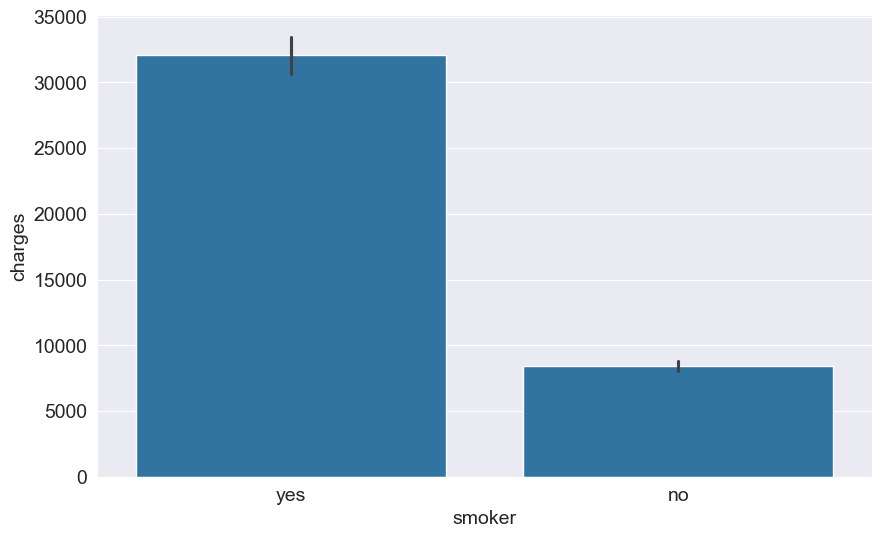

In [137]:
#Binary Categorization
#Assign no to 0 and yes to 1
sns.barplot(data = medical_df, y = 'charges', x = 'smoker')

In [138]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df['smoker'].map(smoker_codes)

In [139]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [141]:
#Linear Regression model with age, bmi, children and smoker
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rsme(targets, predictions)
print(f"Loss: {loss}")

Loss: 6056.439217188081


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

invalid value encountered in matmul



<Axes: xlabel='sex', ylabel='charges'>

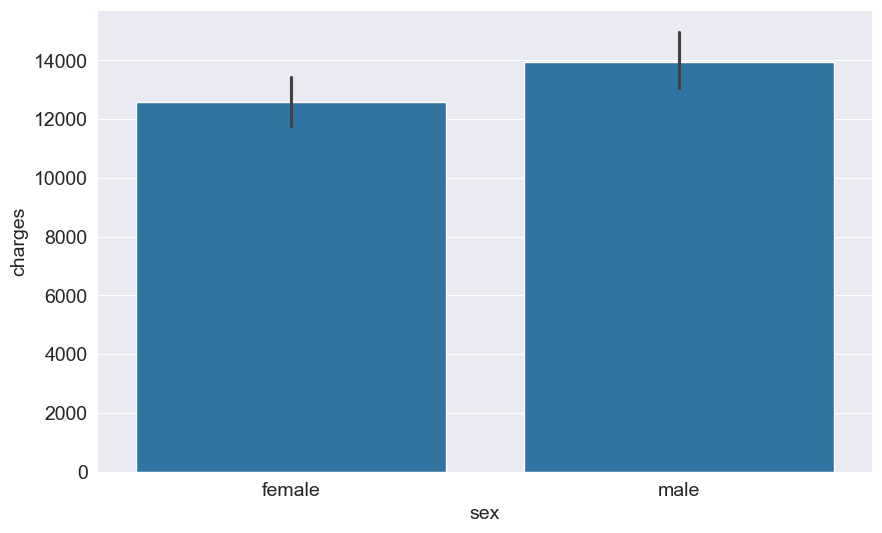

In [142]:
#Add sex to the model
sns.barplot(data = medical_df, y = 'charges', x = 'sex')

In [143]:
sex_codes = {'male': 1, 'female': 0}
medical_df['sex_code'] = medical_df['sex'].map(sex_codes)

In [147]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rsme(targets, predictions)
print(f"Loss: {loss}")

Loss: 6056.100708754546


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

invalid value encountered in matmul



In [ ]:
#One-Hot Encoding for Regions
#4 columns: NorthE, NorthW, SouthE, SouthW, assign a 1 or 0 based on yes or no
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='charges'>

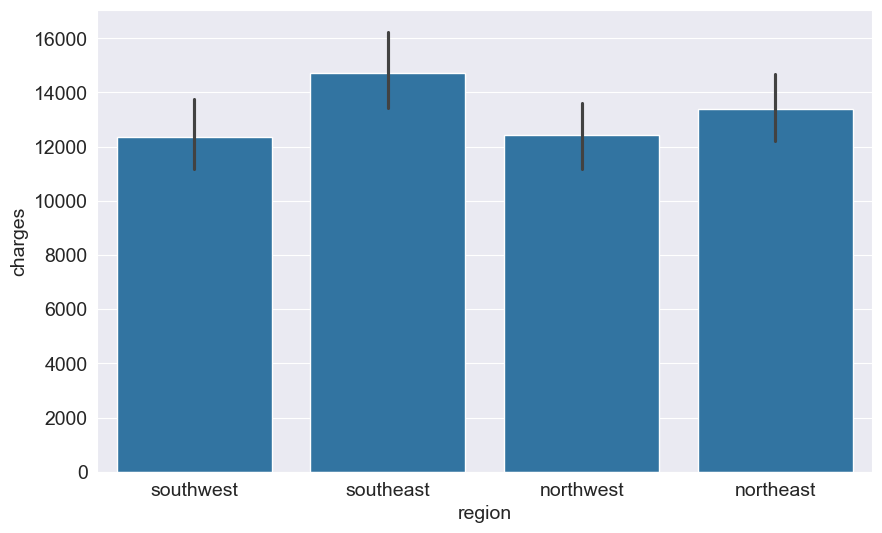

In [149]:
sns.barplot(data = medical_df, y = 'charges', x = 'region')

In [150]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [151]:
enc.transform([['northeast']]).toarray()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [153]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [154]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [156]:
medical_df.sample(5)

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
694,27,female,34.800,1,no,southwest,3577.99900,0,0,0.0,0.0,0.0,1.0
1306,29,female,21.850,0,yes,northeast,16115.30450,1,0,1.0,0.0,0.0,0.0
954,34,male,27.835,1,yes,northwest,20009.63365,1,1,0.0,1.0,0.0,0.0
38,35,male,36.670,1,yes,northeast,39774.27630,1,1,1.0,0.0,0.0,0.0
1203,51,male,32.300,1,no,northeast,9964.06000,0,1,1.0,0.0,0.0,0.0


In [157]:
#Include region in the model
input_columns = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_columns], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rsme(targets, predictions)
print(f"Loss: {loss}")

Loss: 6041.6796511744515


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

invalid value encountered in matmul



In [158]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [160]:
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

In [163]:
weights_df = pd.DataFrame({
    'feature': np.append(input_columns, 'intercept'),
    'weights': np.append(model.coef_, model.intercept_)
    }
)
weights_df

,feature,weights
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,intercept,-12525.547811


In [164]:
#The weights are not correct because the values are not standardized. Age values are large while region values are 0 or 1
#The values can be standardized using z-scores -> (x - mean)/stddev
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
numeric_columns = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_columns])

,copy,True
,with_mean,True
,with_std,True


In [167]:
scaler.mean_, scaler.var_

(array([39.20702541, 30.66339686,  1.09491779]),
 array([197.25385199,  37.16008997,   1.45212664]))

In [185]:
scaled_inputs = scaler.transform(medical_df[numeric_columns])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [186]:
categorial_columns = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[categorial_columns].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]], shape=(1338, 6))

In [191]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)

In [192]:
inputs[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [193]:
target = medical_df['charges']
model = LinearRegression().fit(inputs, target)
predictions = model.predict(inputs)
loss = rsme(target, predictions)
print(f"Loss: {loss}")

Loss: 6041.6796511744515


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning:

invalid value encountered in matmul



In [204]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_columns + categorial_columns, 'intercept'),
    'weights': np.append(model.coef_, model.intercept_)
    }
)
weights_df.sort_values(by = 'weights', ascending = False, inplace = True)
weights_df

,feature,weights
3,smoker_code,23848.534542
9,intercept,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [206]:
new_customers = [[28, 30, 2, 1, 0, 0, 1, 0, 0]]

In [207]:
scaler.transform([[28, 30, 2]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [208]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0]])

array([29875.81463371])